# WINE DATA USING REGRESSION

### Table of Contents

1. [Problem Statement](#section1)<br>
2. [Importing Packages](#section2)<br>
3. [Data Loading and Description](#section3)<br>
   - 3.1 [Description of the dataset](#section301)<br>
   - 3.2 [Pandas Profiling before Data Preprocessing](#section302)<br>
4. [Data Exploration](#section4)<br>
   - 4.1 [Data Preprocessing](#section401)<br>
   - 4.2 [Exploratory Data Analysis](#section402)<br>
5. [Data train/test split](#section6)<br>
6. [Modelling using scikit learn](#section7)<br>
   - 6.1 [Linear Regression in Scikit-Learn](#section701)<br>
   - 6.2 [Decision tree Regressor in Scikit-Learn](#section702)<br>
   - 6.3 [Random Forest Regressor in Scikit-Learn](#section703)<br>

7. [Conclusion](#section9)<br>









# 1.Problem statement

<a id=section1></a>
### It is very difficult to assess the quality of wine just by reading the label. Quality is assessed best by tasting. but as we have dataset which contains different ingredient of wine and also we have Quality of Wine column. So based on that we will try to find out what should be level of varous ingredients to get the best quality of wine.


<a id=section2></a>
# 2.Importing packages

In [22]:
import numpy as np
np.set_printoptions(precision=4)      # To display values upto Four decimal places. 

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.

import pandas_profiling

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')    # To apply seaborn whitegrid style to the plots.
plt.rc('figure', figsize=(10, 8))     # Set the default figure size of plots.
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")     # To suppress all the warnings in the notebook.


import seaborn as sns


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from math import sqrt


In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn import svm


<a id=section3></a>
# 3.Data Loading and Description

In [6]:
# Importing the dataset
wine=pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/winequality.csv')


In [7]:
wine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [9]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [10]:
# Checking for missing values in each column.

wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [11]:
# red wine columns
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [9]:
#Now let's check the dataset shape so we can see the number of rows and columns
wine.shape


(6497, 12)

In [94]:
#We load the .csv and visualize the first ten rows of it, we can also see the columns name
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


<a id=section301></a>
# 3.1 Description of the dataset

#### This dataset provides information about wine's ingredient like citric acid, chlorides, sulfur dioxide, density, PH, alcohol etc.

In [136]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [95]:
wine['quality'].unique()

array([5, 6, 7, 4, 8, 3, 9])

<a id=section302></a>
# 3.1 Pandas Profiling before Data Preprocessing

In [117]:
# If pandas profiling gives an error, please update pandas-profiling by running this command in the comments below.

!pip install pandas-profiling --upgrade

Requirement already up-to-date: pandas-profiling in /opt/anaconda3/lib/python3.7/site-packages (2.9.0)


In [12]:
import pandas_profiling

In [23]:
# Performing pandas profiling before data preparation.
# Saving the output as ld_before_preprocessing.html

# To output pandas profiling report to an external html file.

profile = wine.profile_report(title='Pandas Profiling before Data Preprocessing')
profile.to_file(output_file="wine_before_preprocessing.html")

# To output the pandas profiling report on the notebook.

#ld.profile_report(title='Pandas Profiling before Data Preprocessing', style={'full_width':True})

<a id=section401></a>
# 4. Data Exploration

<a id=section401></a>
### 4.1 Data Preprocessing

#### Since most of the columns in the dataset have missing values and contain data with textual values in them, they can't be used for Statistical Analysis and Data Visualization without performing Data Preprocessing on them.

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

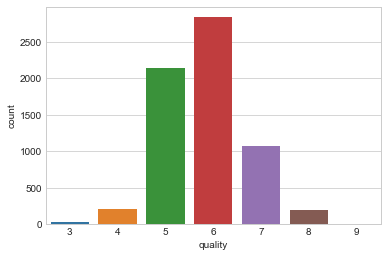

In [13]:
#let's start visualizing the different quality values and how many wines have that rating in our dataset
sns.countplot(wine['quality'])
wine['quality'].value_counts()

In [144]:
#Calculate and order correlations
correlations = wine.corr()['quality'].sort_values(ascending=False)
print(correlations)

quality                 1.000000
alcohol                 0.444319
citric acid             0.085532
free sulfur dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual sugar         -0.036980
total sulfur dioxide   -0.041385
fixed acidity          -0.076743
chlorides              -0.200666
volatile acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64


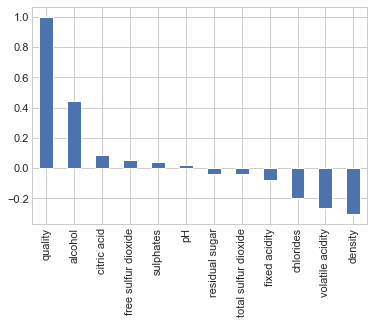

In [145]:
correlations.plot(kind='bar')

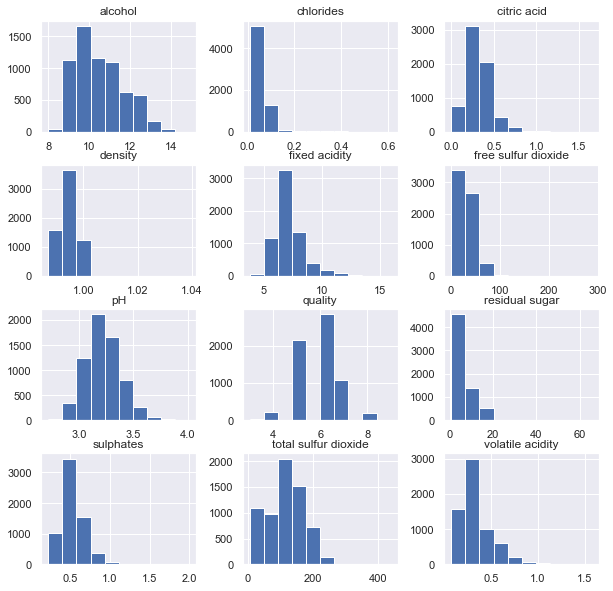

In [18]:
# The distribution of the data by visualizing with a bar plot
# red wine distribution
sns.set()
wine.hist(figsize=(10,10))
plt.show()

In [99]:
# Find correlations of each feature with the target variable (quality)

correlations = wine.corr()['quality'].drop('quality')
print(correlations)

fixed acidity          -0.076743
volatile acidity       -0.265699
citric acid             0.085532
residual sugar         -0.036980
chlorides              -0.200666
free sulfur dioxide     0.055463
total sulfur dioxide   -0.041385
density                -0.305858
pH                      0.019506
sulphates               0.038485
alcohol                 0.444319
Name: quality, dtype: float64


# Depends on the quality how much Alcohol percent in the wine?


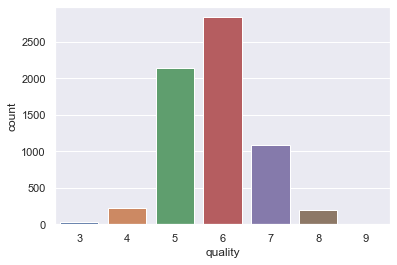

In [10]:
sns.set(style="darkgrid")
sns.countplot(wine["quality"],data=wine)
plt.show()

In [156]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print('X train shape: ' + str(x_train.shape))
print('X test shape: ' + str(x_test.shape))

X train shape: (5197, 11)
X test shape: (1300, 11)


# What range of quality label is there?

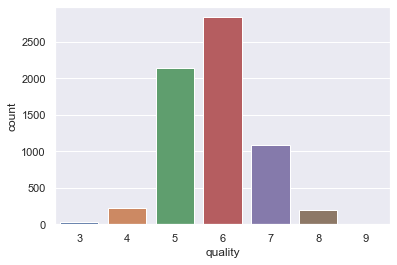

In [12]:

sns.set(style="darkgrid")
sns.countplot(wine["quality"],data=wine)
plt.show()

Data Transformation

We want to transfer the score(num) to low-medium-high quality level(categorical) by:

3,4 -> low

5,6 -> medium

7,8,9 -> high

In [14]:
quality = wine["quality"].values
category = []
for num in quality:
    if num < 5:
        category.append("Low")
    elif num > 6:
        category.append("High")
    else:
        category.append("Medium")

In [15]:
[(i, category.count(i)) for i in set(category)]

[('Low', 246), ('Medium', 4974), ('High', 1277)]

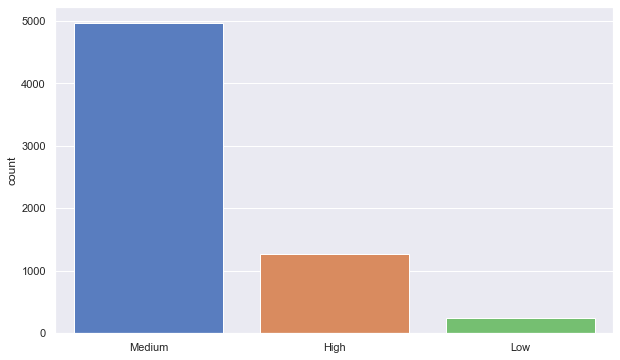

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(category, palette="muted")

# Will a categorical quality label help?

In [160]:
# # Set a new field quality_label by transforming the existing quality column
# data['quality_label'] = data['quality'].apply(lambda value: 'low' if value <= 5 
#                                                               else 'medium' if value <= 7 
#                                                               else 'high')
# # Convert new field to categorical type
# data['quality_label'] = pd.Categorical(data['quality_label'], 
#                                        categories=['low', 'medium', 'high'])

# Simpler way to do it
bins = [1, 5, 6, 8]
wine['quality_label'] = pd.cut(wine.quality, bins, labels=['low', 'medium', 'high'], include_lowest=True)

In [161]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low


According to heatmap, we can focus on alcohol-quality and density-alcohol relations to get meaningful exploration

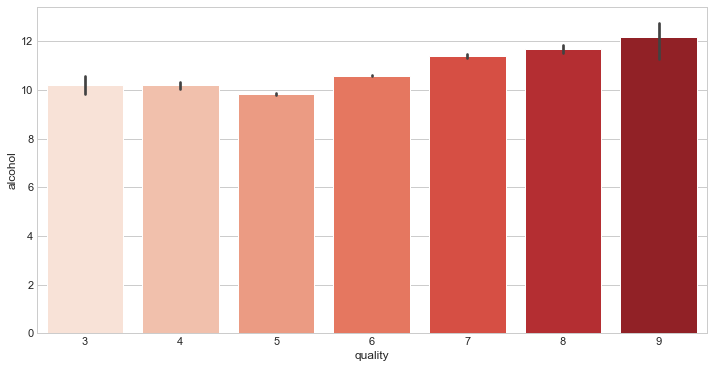

In [89]:
plt.figure(figsize=(12,6))
sns.barplot(x=wine["quality"],y=wine["alcohol"],palette="Reds")

<Figure size 864x432 with 0 Axes>

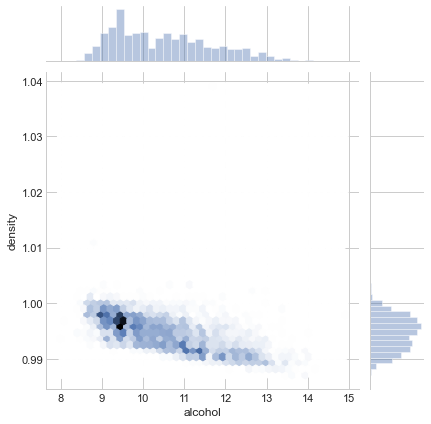

In [91]:
plt.figure(figsize=(12,6))
sns.jointplot(y=wine["density"],x=wine["alcohol"],kind="hex")

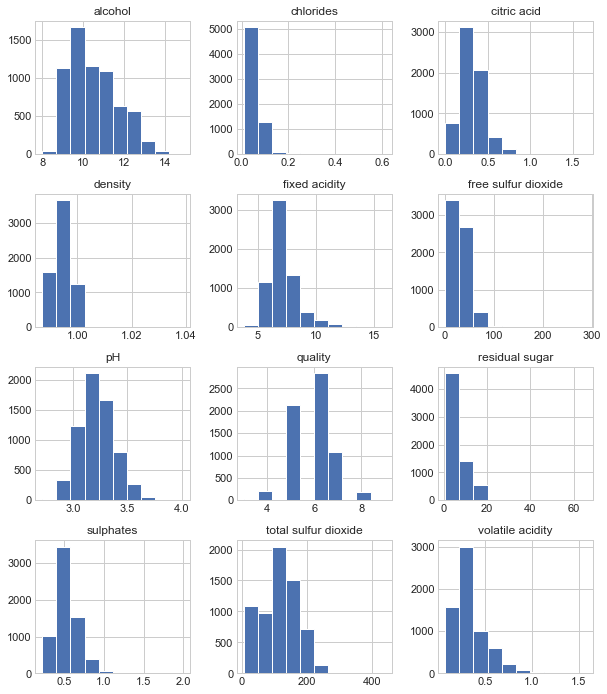

In [93]:
wine.hist(figsize=(10,12));

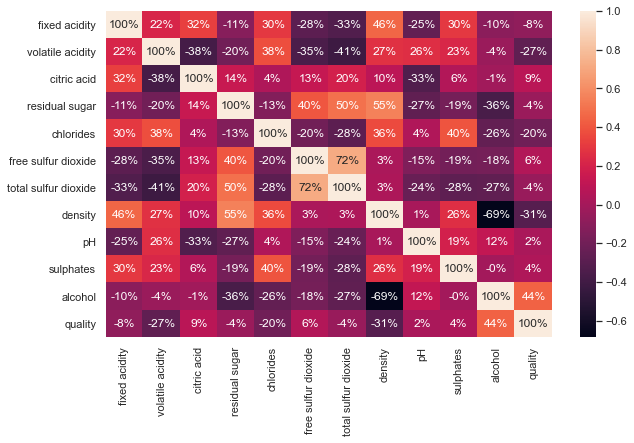

In [17]:

#Heatmap to plot all correlations between features
plt.figure(figsize=(10,6))
sns.heatmap(wine.corr(), annot=True, fmt='.0%')

In [105]:
wine_quality_five_six = wine.loc[(wine['quality'] >= 5) & (wine['quality'] <= 6)]
wine_quality_five_six['quality'].value_counts()


6    2836
5    2138
Name: quality, dtype: int64

In [106]:
correlations_subset = wine_quality_five_six.corr()['quality'].sort_values(ascending=False)
print(correlations_subset)

quality                 1.000000
alcohol                 0.346725
citric acid             0.052121
free sulfur dioxide     0.026089
sulphates               0.021045
pH                      0.017191
residual sugar         -0.025518
total sulfur dioxide   -0.046448
fixed acidity          -0.057848
chlorides              -0.142791
density                -0.222920
volatile acidity       -0.226396
Name: quality, dtype: float64


## How much Sulphates and Citric Acid Presence in the wine?

[Text(0.5, 1.0, 'Sulphates in Different Quality Wines')]

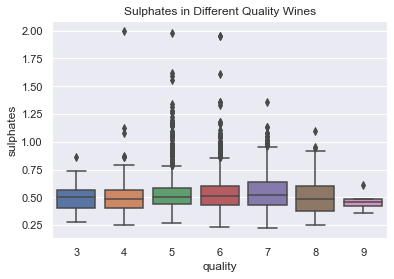

In [162]:
bp = sns.boxplot(x='quality',y='sulphates', data=wine)
bp.set(title="Sulphates in Different Quality Wines")

[Text(0.5, 1.0, 'Citric Acid in Different Quality Wines')]

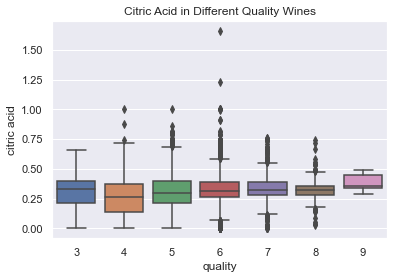

In [163]:
bp = sns.boxplot(x='quality',y='citric acid', data=wine)
bp.set(title="Citric Acid in Different Quality Wines")

## How much Acetic acid present in  the different quality of wines?

[Text(0.5, 1.0, 'Acetic Acid Presence in Different Quality Wines')]

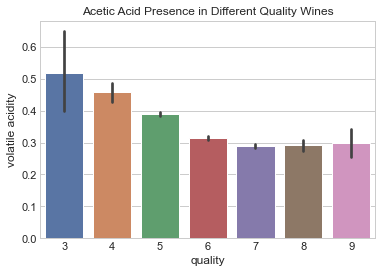

In [112]:
bp = sns.barplot(x='quality',y='volatile acidity', data=wine)
bp.set(title="Acetic Acid Presence in Different Quality Wines")

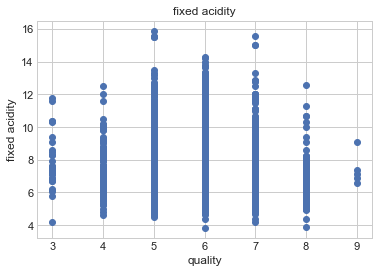

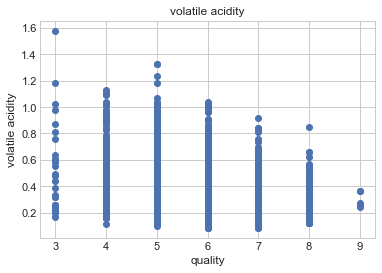

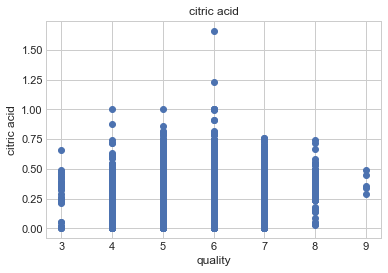

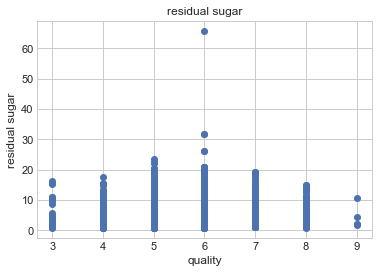

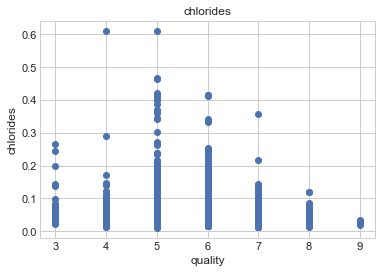

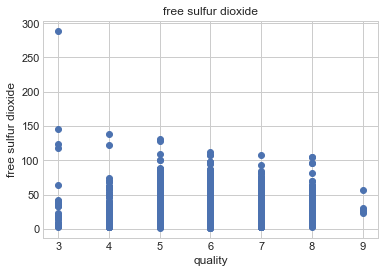

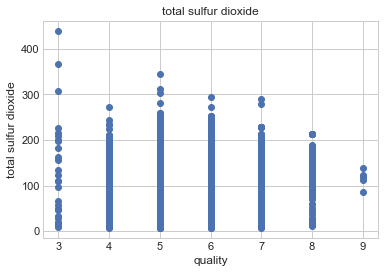

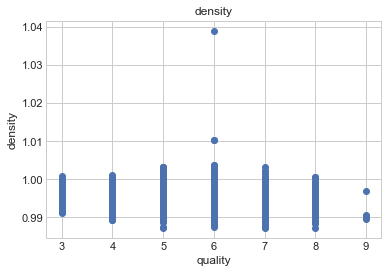

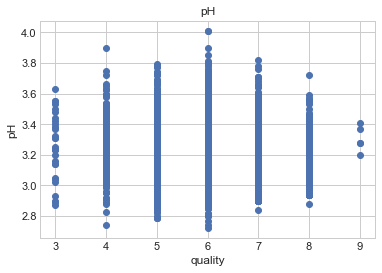

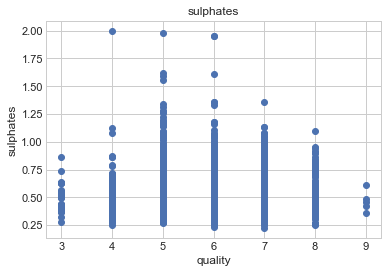

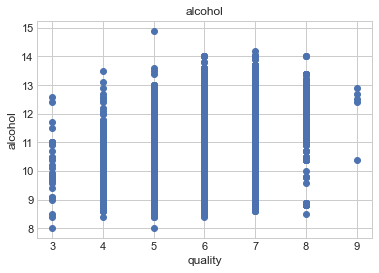

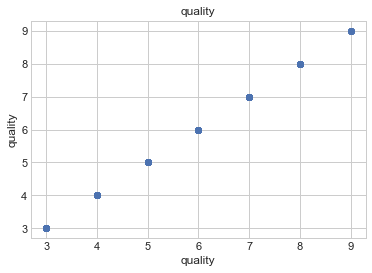

In [187]:
for label in wine.columns[:-1]:
# for label in ['alcohol']:
    plt.scatter(wine['quality'], wine[label])
    plt.title(label)
    plt.xlabel('quality')
    plt.ylabel(label)

    plt.show()

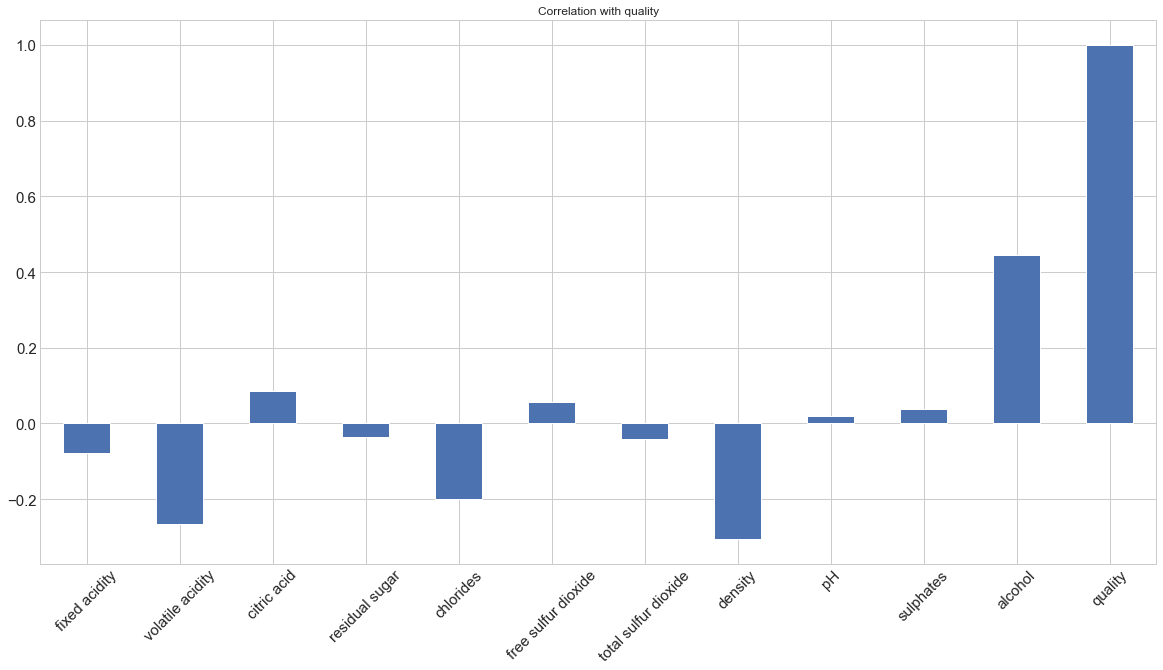

In [188]:
#Correlation with Quality with respect to attributes
wine.corrwith(wine.quality).plot.bar(
        figsize = (20, 10), title = "Correlation with quality", fontsize = 15,
        rot = 45, grid = True)

In [189]:
## Correlation Matrix
sns.set(style="white")

# Compute the correlation matrix
corr = wine.corr()

In [190]:
corr.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666


# <a id=section5></a>
## 5. Data train/test split

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
# Splitting the dataset into training and test sets.

wine_train, wine_test = train_test_split(wine, test_size = 0.2, random_state = 2)

In [26]:
# Since the numbers 3-9 don't really mean much, lets map these to low(0), mid(1), and high(2)
bins = [0, 5.5, 7.5, 10] # this means 3-5 are low, 6-7 are mid, 8-9 are high
labels = [0, 1, 2]
wine['quality'] = pd.cut(wine['quality'], bins=bins, labels=labels)

In [30]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [27]:
x = wine[wine.columns[:-1]]
y = wine['quality']
sc = StandardScaler()
x = sc.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

In [28]:
# Checking the shapes of training and test sets.

print('Shape of x_train: ', x_train.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of x_test: ', x_test.shape)
print('Shape of y_test: ', y_test.shape)

Shape of x_train:  (5197, 11)
Shape of y_train:  (5197,)
Shape of x_test:  (1300, 11)
Shape of y_test:  (1300,)


# 6. Modelling in Scikit-Learn
To apply any machine learning algorithm on your dataset, basically there are 4 steps:

Load the algorithm
Instantiate and Fit the model to the training dataset
Prediction on the test set
Calculating Root mean square error
The code block given below shows how these steps are carried out:




```from sklearn.linear_model import LinearRegression
    linreg = LinearRegression()
    linreg.fit(x_train, y_train) 
    RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))```

In [29]:
for data in [y_train, y_test]:
    print(data.describe())

count     5197
unique       3
top          1
freq      3103
Name: quality, dtype: int64
count     1300
unique       3
top          1
freq       812
Name: quality, dtype: int64


# Classify The Quality

In [59]:
quality = wine["quality"].values
category = []
for num in quality:
    if num<5:
        category.append("Bad")
    elif num>6:
        category.append("Good")
    else:
        category.append("Mid")

In [61]:
#Create new data
category = pd.DataFrame(data=category, columns=["category"])
wine = pd.concat([wine,category],axis=1)
wine.drop(columns="quality",axis=1,inplace=True)

In [30]:
wine.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0


<a id=section701></a>
### 6.1 Linear Regression Model

In [31]:
# Creating our linear regression model and fitting the data into it.

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
# Making predictions on the test set.

y_pred_test = linreg.predict(x_test)
y_pred_test[:10]

array([1.1304, 0.1875, 0.9182, 0.5752, 0.4106, 0.8833, 0.8031, 0.8391,
       0.2407, 0.9356])

Model Evaluation

<a id=section801></a>
Mean Absolute Error (MAE)

- __Mean Absolute Error__ (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

In [172]:
from sklearn import metrics

In [175]:
# Creating a list of the names of x_train columns for future use. 

features = x_train.columns
features

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [176]:
# Checking the shapes of training and test sets.

print('Shape of x_train: ', x_train.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of x_test: ', x_test.shape)
print('Shape of y_test: ', y_test.shape)

Shape of x_train:  (5197, 11)
Shape of y_train:  (5197,)
Shape of x_test:  (1300, 11)
Shape of y_test:  (1300,)


In [ ]:
print('MSE of the model is {}'.format(MSE_train))

# K Nearest Neighbors Classifier

In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.63      0.64      0.63       451
           1       0.77      0.79      0.78       812
           2       0.25      0.08      0.12        37

    accuracy                           0.71      1300
   macro avg       0.55      0.50      0.51      1300
weighted avg       0.70      0.71      0.71      1300




# Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=250)
rfc.fit(x_train, y_train)
pred_rfc = rfc.predict(x_test)
print(classification_report(y_test, pred_rfc))


              precision    recall  f1-score   support

           0       0.74      0.74      0.74       451
           1       0.83      0.85      0.84       812
           2       0.86      0.32      0.47        37

    accuracy                           0.80      1300
   macro avg       0.81      0.64      0.68      1300
weighted avg       0.80      0.80      0.80      1300



In [69]:
def get_mae_rf(num_est, predictors_train, predictors_val, targ_train, targ_val): 

    # fitting model with input max_leaf_nodes
    model = RandomForestRegressor(n_estimators=num_est, random_state=0)

    # fitting the model with training dataset
    model.fit(predictors_train, targ_train)

    # making prediction with the test dataset
    preds_val = model.predict(predictors_val)

    # calculate and return the MAE
    mae = mean_absolute_error(targ_val, preds_val)
    return(mae)

In [74]:
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = 0, stratify = y)


In [75]:
from sklearn import preprocessing

In [76]:
scaler = preprocessing.StandardScaler().fit(train_x)
train_x_scaled = scaler.transform(train_x)

In [77]:
test_x_scaled = scaler.transform(test_x)

In [81]:
models = []
models.append(('DecisionTree', DecisionTreeRegressor()))
models.append(('RandomForest', RandomForestRegressor()))

models.append(('SVR', SVR()))
names = []

In [82]:
for name,model in models:
    kfold = model_selection.KFold(n_splits=5,random_state=2)
    cv_results = model_selection.cross_val_score(model,train_x_scaled,train_y, cv= kfold, scoring = 'neg_mean_absolute_error')
    names.append(name)
    msg  = "%s: %f" % (name, -1*(cv_results).mean())
    print(msg)

DecisionTree: 0.297413
RandomForest: 0.308657
SVR: 0.314961


Regression models can be validated using Mean Absolute Error(MAE). The less the mae value the better the model works. From above results we can decide that Random Forest model works better than other models for our data.

In [83]:
model = RandomForestRegressor()
model.fit(train_x_scaled,train_y)
pred_y = model.predict(test_x_scaled)

In [84]:
mean_absolute_error(pred_y,test_y)


0.2958769230769231

In [85]:
test_y.head()

799     1
4766    1
1515    1
5513    1
5645    1
Name: quality, dtype: category
Categories (3, int64): [0 < 1 < 2]

In [86]:
pred_y

array([0.5, 0.9, 0.5, ..., 0.9, 1.1, 0.9])

In [87]:
model = RandomForestRegressor(n_estimators=36)
model.fit(train_x_scaled,train_y)
pred_y = model.predict(test_x_scaled)

In [88]:
mean_absolute_error(pred_y,test_y)

0.29217094017094014

In [56]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
pred_svc =svc.predict(x_test)

# Decision Tree Classifier

In [57]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,pred_svc))

              precision    recall  f1-score   support

           0       0.66      0.65      0.65       451
           1       0.77      0.81      0.79       812
           2       0.00      0.00      0.00        37

    accuracy                           0.73      1300
   macro avg       0.48      0.49      0.48      1300
weighted avg       0.71      0.73      0.72      1300



In [33]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
pred_dt = dt.predict(x_test)
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.61      0.68      0.64       451
           1       0.78      0.74      0.76       812
           2       0.32      0.35      0.33        37

    accuracy                           0.70      1300
   macro avg       0.57      0.59      0.58      1300
weighted avg       0.71      0.70      0.71      1300



In [34]:
# Define a function which returns features whose correlation is above a certain threshold value
# (passed as an input parameter to our function) 

def get_features(correlation_threshold):
    max_corrs = correlations.abs()
    high_correaltions = max_corrs
    high_correaltions =  max_corrs[max_corrs > correlation_threshold].index.values.tolist()

    return high_correaltions

In [35]:
# Create vector X of input features (predictor)containing all features whose correlation is above 0.05 
# And a vector y which is containing the quality (target variable)

features = get_features(0.1)
print(features)
x = wine[features]
y = wine['quality'] 
x

['volatile acidity', 'chlorides', 'density', 'alcohol']


,volatile acidity,chlorides,density,alcohol
0,0.70,0.076,0.99780,9.4
1,0.88,0.098,0.99680,9.8
2,0.76,0.092,0.99700,9.8
3,0.28,0.075,0.99800,9.8
4,0.70,0.076,0.99780,9.4
...,...,...,...,...
6492,0.21,0.039,0.99114,11.2
6493,0.32,0.047,0.99490,9.6
6494,0.24,0.041,0.99254,9.4
6495,0.29,0.022,0.98869,12.8


In [34]:
# Build the linear regression model using LinearRegression()

regressor = LinearRegression()

# Fit the model to our training data

regressor.fit(x_train, y_train)

# Print the values of coefficients of each feature

print(regressor.coef_)

[ 5.1720e-02 -1.4204e-01 -1.9769e-02  1.2176e-01  2.3860e-05  6.6252e-02
 -9.0648e-02 -8.4057e-02  4.2272e-02  5.9019e-02  1.9496e-01]


In [46]:
 #Calculating other error functions

print('Mean Absolute Error:', metrics.mean_absolute_error(test_pred, y_test))
print('Mean Squared Error:', metrics.mean_squared_error(test_pred, y_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_pred, y_test)))

Mean Absolute Error: 0.379694662294855
Mean Squared Error: 0.21435226402541274
Root Mean Squared Error: 0.4629819262405529


In [45]:
# round off the predicted values of the test set

predicted_data = np.round_(test_pred)
print(predicted_data)

[1. 0. 1. ... 1. 0. 1.]


In [35]:
# Predict the quality of wine using our model (predict())

train_pred = regressor.predict(x_train)
print(train_pred)
test_pred = regressor.predict(x_test)
print(test_pred)

[0.7179 1.0958 0.736  ... 0.4321 0.4516 0.2128]
[1.1304 0.1875 0.9182 ... 1.2252 0.3525 0.5126]


# PCA (Principal Component Analysis)

In [36]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 2)  # we will reduce the data set from 11 columns to 2 columns.
x_train2 = pca.fit_transform(x_train) # fit means train, fit_transform means train and apply to a data set.
x_test2 = pca.transform(x_test)  # Only transformation

# X_train2 is a 2 dimensional data set.

In [39]:
# LR before PCA transformation
from sklearn.linear_model import LogisticRegression

# random_state = 0 because the model will be used two times and we want to have same structure.
# Thus, same LR algorithm structure will run.
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

# Conclusion

In [58]:
conclusion = pd.DataFrame({'models': ["SVC","Random Forest","KNN"],
                           'accuracies': [accuracy_score(y_test,pred_svc),accuracy_score(y_test,pred_rfc),accuracy_score(y_test,pred_knn)]})
conclusion

,models,accuracies
0,SVC,0.733846
1,Random Forest,0.799231
2,KNN,0.714615


## As a result, we can see Random Forest model has the best accurasy ratio for predicting our wine quality!